In [13]:
from tensorflow.keras.applications import DenseNet201
transfer_model = DenseNet201(weights='imagenet',include_top = False,input_shape=(224,224,3))

#top = false meant i only need layers without output one
#input_shape rather tahn upscale our cifar we told the model that we will give you images from this size
#"vgg16" --> 224x224

74836368/74836368 [==============================] - 6s 0us/step


In [ ]:
transfer_model.summary()

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from tensorflow import keras 

In [41]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [42]:
X_train = np.array(X_train, dtype='float')/255.0 # norm to [0,1]
y_train = np.array(y_train, dtype='short')
X_test = np.array(X_test, dtype='float')/255.0 # norm to [0,1]
y_test = np.array(y_test, dtype='short')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [43]:
from tensorflow.keras import utils



#reshape each input vector (784) into a 28*28*1 image 
X_train = np.reshape(X_train, (-1,32,32,3)) 
X_test = np.reshape(X_test, (-1,32,32,3))


# convert MNIST labels into 10-D one-hot vectors - upper-case label y
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


Note that there is no dense layer in the summary

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.UpSampling2D(size=(7,7)))
model.add(transfer_model)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10,activation='softmax'))

# compile model by attaching with loss/optimizer/metric
model.compile(loss="categorical_crossentropy",
              optimizer='Adam',
              metrics=["accuracy"])

# learning a model
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 978s 608ms/step - loss: 0.6979 - accuracy: 0.7653 - val_loss: 0.5983 - val_accuracy: 0.8006
Epoch 2/10
1563/1563 [==============================] - 899s 575ms/step - loss: 0.4163 - accuracy: 0.8602 - val_loss: 0.4981 - val_accuracy: 0.8358
Epoch 3/10
1563/1563 [==============================] - 898s 574ms/step - loss: 0.3364 - accuracy: 0.8873 - val_loss: 0.4461 - val_accuracy: 0.8578
Epoch 4/10
1563/1563 [==============================] - 896s 573ms/step - loss: 0.2824 - accuracy: 0.9030 - val_loss: 0.3543 - val_accuracy: 0.8855
Epoch 5/10
1563/1563 [==============================] - 896s 573ms/step - loss: 0.2342 - accuracy: 0.9204 - val_loss: 0.3929 - val_accuracy: 0.8765
Epoch 6/10
1563/1563 [==============================] - 935s 598ms/step - loss: 0.1959 - accuracy: 0.9340 - val_loss: 0.3562 - val_accuracy: 0.8888
Epoch 7/10
1563/1563 [==============================] - 934s 598ms/step - loss: 0.1674 - accuracy: 0.9433 - val_

In [44]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 
y_test=np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element)for element in y_pred]
X_test.shape




# 2
print("Your report Sir:  \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 42s 135ms/step
Your report Sir:  
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1000
           1       0.96      0.96      0.96      1000
           2       0.88      0.91      0.90      1000
           3       0.82      0.85      0.84      1000
           4       0.95      0.88      0.91      1000
           5       0.81      0.89      0.85      1000
           6       0.96      0.93      0.95      1000
           7       0.98      0.88      0.93      1000
           8       0.97      0.91      0.94      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_2 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_2   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 256)               491776    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 256)             

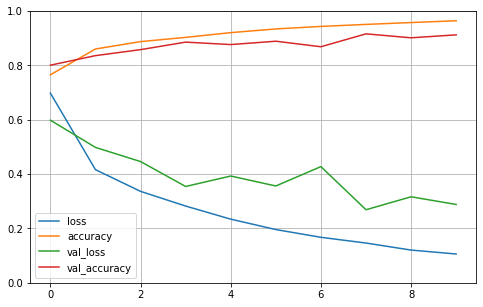

In [27]:
# show the learning curves 
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()